In [102]:
import matplotlib.pyplot as plt
import numpy as np
from cat_stax import grid1, init_puzzle_grid, solve_puzzle

In [103]:
grid, cats=solve_puzzle(['black', 'mint', 'violet', 'sky', 'teal'], grid1)

[['S' 'M' 'M' 'T' 'T']
 ['S' 'M' 'M' 'M' 'T']
 ['B' 'M' 'B' 'V' 'V']
 ['B' 'B' 'B' 'V' 'V']
 ['B' 'B' 'B' 'V' 'V']]


In [104]:
grid5=init_puzzle_grid(6,7)
grid, cats=solve_puzzle(['arctic','violet', 'sky', 'teal', 'yellow', 'black', 'red'], grid5)

[['V' 'V' 'R' 'R' 'S' 'S' 'A']
 ['V' 'V' 'R' 'A' 'A' 'A' 'A']
 ['V' 'V' 'R' 'A' 'A' 'A' 'A']
 ['Y' 'R' 'R' 'R' 'B' 'B' 'B']
 ['Y' 'Y' 'Y' 'T' 'T' 'B' 'B']
 ['Y' 'Y' 'Y' 'T' 'B' 'B' 'B']]


In [105]:
grid14=init_puzzle_grid(7,6)
grid, cats=solve_puzzle(['pink','arctic', 'violet', 'green', 'mint', 'sky', 'teal'], grid14)

[['T' 'T' 'G' 'S' 'S' 'G']
 ['T' 'M' 'G' 'G' 'G' 'G']
 ['M' 'M' 'G' 'P' 'P' 'G']
 ['M' 'M' 'M' 'P' 'G' 'G']
 ['V' 'V' 'P' 'P' 'P' 'A']
 ['V' 'V' 'A' 'A' 'A' 'A']
 ['V' 'V' 'A' 'A' 'A' 'A']]


In [106]:
grid16=init_puzzle_grid(8, 7, blocked_indices=((2,1),
                                       (2, 5),
                                       (5, 1),
                                       (5, 5)))

grid, cats = solve_puzzle(['black',
                           'indigo',
                           'arctic',
                           'yellow',
                           'violet',
                           'mint',
                           'teal',
                           'sky',
                           'red'], grid16)

[['V' 'V' 'V' 'T' 'T' 'M' 'M']
 ['V' 'V' 'V' 'T' 'M' 'M' 'M']
 ['B' 'X' 'B' 'R' 'R' 'X' 'M']
 ['B' 'B' 'B' 'R' 'I' 'I' 'S']
 ['B' 'B' 'B' 'R' 'I' 'I' 'S']
 ['Y' 'X' 'R' 'R' 'R' 'X' 'A']
 ['Y' 'Y' 'Y' 'A' 'A' 'A' 'A']
 ['Y' 'Y' 'Y' 'A' 'A' 'A' 'A']]


In [107]:
colour_map = {"V": 'violet',
             'T': 'teal',
             'M': 'palegreen', #no default colour
             'B': 'black',
             "X": 'xkcd:putty', #walls
             "R": 'red',
             "I": 'indigo',
             "S": 'cyan', 
             "G": 'green',
             "A": 'lightblue',
             "Y": 'yellow',
             "P": 'pink',
             "W": 'white'
             }

In [108]:
def plot_puzzle(solved_puzzle, is_2d=True, colour_map = colour_map, az=0):
    m = solved_puzzle.shape[0]
    n= solved_puzzle.shape[1]

    #remove X characters (non-placeable spaces)
    solved_puzzle=np.strings.replace(solved_puzzle, "X", "")

    if is_2d:
        z = 1
        solved_puzzle = np.pad(solved_puzzle.reshape((m,n,1)), [(0, 0), (0, 0), (0, 2)], "constant", constant_values="")
    else:
        z= solved_puzzle.shape[2]

    #initate puzzle shape with true val for all indices
    puzzle_space = (solved_puzzle != '')

    colours = np.empty(puzzle_space.shape, dtype=object)
    for label, colour in colour_map.items():
        colour_mask = (solved_puzzle == label)
        colours[colour_mask] = colour

    
    ax = plt.figure().add_subplot(projection='3d')
    ax.voxels(puzzle_space, facecolors=colours, edgecolor='gray', shade=False)
    if az !=0:
        ax.view_init(azim=az)

    ax.axis('equal')
    plt.show()

    return ax
    

In [109]:
grid16=init_puzzle_grid(8, 7, blocked_indices=((2,1),
                                       (2, 5),
                                       (5, 1),
                                       (5, 5)))

solved_grid16, cats = solve_puzzle(['black',
                           'indigo',
                           'arctic',
                           'yellow',
                           'violet',
                           'mint',
                           'teal',
                           'sky',
                           'red'], grid16)

[['V' 'V' 'V' 'T' 'T' 'M' 'M']
 ['V' 'V' 'V' 'T' 'M' 'M' 'M']
 ['B' 'X' 'B' 'R' 'R' 'X' 'M']
 ['B' 'B' 'B' 'R' 'I' 'I' 'S']
 ['B' 'B' 'B' 'R' 'I' 'I' 'S']
 ['Y' 'X' 'R' 'R' 'R' 'X' 'A']
 ['Y' 'Y' 'Y' 'A' 'A' 'A' 'A']
 ['Y' 'Y' 'Y' 'A' 'A' 'A' 'A']]


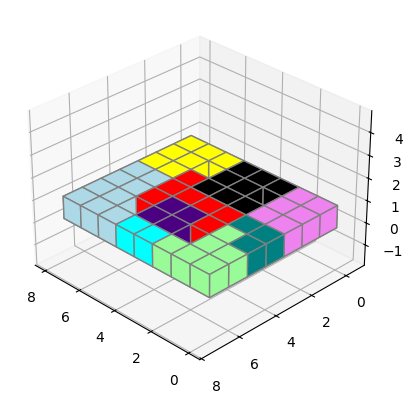

<Axes3D: >

In [110]:
plot_puzzle(solved_grid16, az=135)

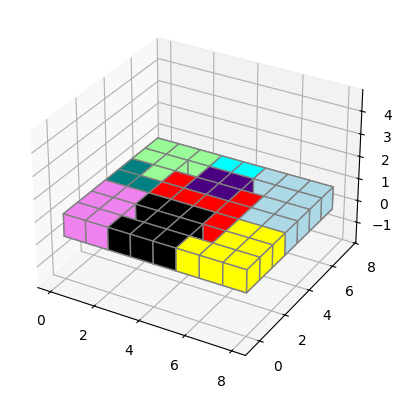

<Axes3D: >

In [111]:
plot_puzzle(solved_grid16)